# ДЗ Линейная регрессия

В данном задании мы рассмотрим набор данных об учащихся, собранный в 2006 году в одной из школ Португалии. Данные представлены в неудобном для машинного обучения виде, и содержат мусор. Ваша задача &mdash; привести их к надлежащему виду и обучить на них простую модель.

Данные состоят из четырех файлов:
- data.csv &mdash; основная таблица с информацией о учащихся
- scores.csv &mdash; список финальных оценок по одному из предметов (20-балльная шкала переведенная в проценты)
- attendance.csv &mdash; таблица посещений занятий по этому предмету
- school_support.txt &mdash; список учащихся, которым оказывается финансовая поддержка

Ваша задача &mdash; построить модель для предсказания финальных оценок исходя из всех остальных данных и проверить качество ее работы с помощью кросс-валидации. В качестве алгоритма мы будем использовать линейную регрессию

Расшифровка столбцов в data.csv для справки:
- age &mdash; возраст
- Medu &mdash; уровень образования матери (по некоторой условной шкале)
- Fedu &mdash; уровень образования отца (по некоторой условной шкале)
- traveltime &mdash; время в пути до школы (1 – < 15 мин., 2 – от 15 до 30 мин., 3 – от 30 мин. to 1 ч.
или 4 – > 1 ч.)
- studytime &mdash; время, затрачиваемое на занятия вне школы (1 – < 2 ч., 2 – от 2 до 5 ч., 3 – от 5 до 10 ч. или 4 – > 10 ч.)
- famrel &mdash; насколько хорошие отношения в семье у учащегося (по некоторой условной шкале)
- freetime &mdash; количество свободного времени вне школы (по некоторой условной шкале)
- goout &mdash; время, затрачиваемое на общение с друзьями (по некоторой условной шкале)
- Dalc &mdash; количество употребления алкоголя в учебные дни (по некоторой условной шкале)
- Walc &mdash; количество употребления алкоголя в неучебные дни (по некоторой условной шкале)
- health &mdash; уровень здоровья (по некоторой условной шкале)
- sex_M &mdash; пол: мужской (1) или женский (0)
- address_U &mdash; живет ли учащийся в городе (1) или в пригороде (0)
- famsize_LE3 &mdash; размер семьи: не больше 3 человек (1) или больше (0)
- Pstatus_T &mdash; живут ли родители вместе (1) или отдельно (0)
- nursery &mdash; посещал ли учащийся детский сад
- plans_university &mdash; планирует ли учащийся поступать в университет (-1 или 1)
- past_failures &mdash; количество неудовлетворительных оценок по другим предметам ранее (от 0 до 4)

*Примечание. Несколько признаков в данных содержат ошибки/проблемы/некорректности. Эти проблемы нужно исправить. Для
проверки &mdash; всего в данных таких проблем четыре.*

### Задача 1: сломанный признак (а может и не один)
__(1 балл)__

Загрузите таблицу data.csv.

Найдите в данных сломанный признак (он не соответствует описанию) и исправьте его.

In [1]:
import pandas as pd
from io import StringIO
import csv

data = pd.read_csv('data.csv')

#смотрим на минимальные и максимальные значения
data.describe()


,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,sex_M,address_U,famsize_LE3,Pstatus_T,nursery,plans_universitypast_failures
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,648.000000,639.000000,643.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,50.164869,2.514638,2.306626,1.747304,1.930663,3.930663,3.180277,3.186728,1.497653,2.286159,3.536210,0.409861,0.696456,0.295840,0.876733,0.802773,7.935285
std,254.768848,1.134552,1.099931,2.716138,0.829510,0.955717,1.051093,1.175751,0.924879,1.285764,1.446259,0.492187,0.460143,0.456771,0.328996,0.398212,6.475653
min,15.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-13.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,0.000000,1.000000,0.000000,1.000000,1.000000,10.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000
max,1991.000000,4.000000,4.000000,50.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,13.000000


In [2]:
#понимаем, что вместо возраста иногда записывали год рождения. Исправляем: 

for i, row in data.iterrows():
    if data.at[i,'age'] > 100:
     data.at[i,'age'] = 2006 - data.at[i,'age']

data.describe()

,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,sex_M,address_U,famsize_LE3,Pstatus_T,nursery,plans_universitypast_failures
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,648.000000,639.000000,643.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.747304,1.930663,3.930663,3.180277,3.186728,1.497653,2.286159,3.536210,0.409861,0.696456,0.295840,0.876733,0.802773,7.935285
std,1.218138,1.134552,1.099931,2.716138,0.829510,0.955717,1.051093,1.175751,0.924879,1.285764,1.446259,0.492187,0.460143,0.456771,0.328996,0.398212,6.475653
min,15.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-13.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,0.000000,1.000000,0.000000,1.000000,1.000000,10.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000
max,22.000000,4.000000,4.000000,50.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,13.000000


In [3]:
#я заметил, что traveltime принимает максимальное значение 50, хотя должно принимать значения от 1 до 4. 
#Значит в наш датасет занесли минуты, вместо показателя 1-4. Исправим это (там ещё кроме 50 в этом столбце есть значения, котоыре > 4)

for i, row in data.iterrows():
    if data.at[i,'traveltime'] > 4:
        if data.at[i,'traveltime'] < 15:
            data.at[i,'traveltime'] = 1
        elif data.at[i,'traveltime'] <= 30:
            data.at[i,'traveltime'] = 2
        elif data.at[i,'traveltime'] <= 60:
            data.at[i,'traveltime'] = 3
        else:
            data.at[i,'traveltime'] = 4

data.describe() 

,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,sex_M,address_U,famsize_LE3,Pstatus_T,nursery,plans_universitypast_failures
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,648.000000,639.000000,643.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,3.930663,3.180277,3.186728,1.497653,2.286159,3.536210,0.409861,0.696456,0.295840,0.876733,0.802773,7.935285
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.955717,1.051093,1.175751,0.924879,1.285764,1.446259,0.492187,0.460143,0.456771,0.328996,0.398212,6.475653
min,15.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-13.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,0.000000,1.000000,0.000000,1.000000,1.000000,10.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,13.000000


In [4]:
#Замечаем то, что последние 2 столбца склеились. Это и является 3 и 4 проблемой. Расклеим их:
data.insert (loc= len(data.columns) , column='past_failures', value = 0)
data.rename(columns = {'plans_universitypast_failures':'plans_university'}, inplace = True) 

for i, row in data.iterrows():
    data.at[i,'past_failures'] = abs(data.at[i,'plans_university']) % 10
    if data.at[i,'plans_university'] < 0:
        data.at[i,'plans_university'] = -1
    else:
        data.at[i,'plans_university'] = 1

data.describe() 

#итого мы нашли все 4 искомых сломанных стобцов с датами и восстановили их

#Ps: здесь использовал at вместо loc. loc буду использовать после 2 задания.

,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,sex_M,address_U,famsize_LE3,Pstatus_T,nursery,plans_university,past_failures
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,648.000000,639.000000,643.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,3.930663,3.180277,3.186728,1.497653,2.286159,3.536210,0.409861,0.696456,0.295840,0.876733,0.802773,0.787365,0.221880
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.955717,1.051093,1.175751,0.924879,1.285764,1.446259,0.492187,0.460143,0.456771,0.328996,0.398212,0.616962,0.593235
min,15.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


### Задача 2: пропуски в данных 
__(1 балл)__

Проверьте, есть ли в данных пропуски (значения NaN). Замените все пропущенные значения на среднее значение этого признака по столбцу.

*Hint: изучите в pandas функции loc, isnull, а также передачу булевых массивов в качестве индексов.*

In [5]:
# printing size 
print(data['age'].size)
#из таблицы data.describe() получаем, что пропуски есть в стобцах goout, Dalc, Walc.
#значений NaN немного, поэтому можем заменить их на среднее

#data['age'] = data['age'].fillna(round(data['age'].mean()))
#мог бы сделать так, но в hint сказано делать по-другому

for i in data.columns.values:
    mask = pd.isna(data[i])
    data[i] = data[i].where(~mask, round(data[i].mean()))
data.describe() 

649


,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,sex_M,address_U,famsize_LE3,Pstatus_T,nursery,plans_university,past_failures
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,3.930663,3.180277,3.186441,1.489985,2.283513,3.536210,0.409861,0.696456,0.295840,0.876733,0.802773,0.787365,0.221880
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.955717,1.051093,1.174866,0.919763,1.280091,1.446259,0.492187,0.460143,0.456771,0.328996,0.398212,0.616962,0.593235
min,15.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


### Задача 3: нормализация данных
__(1 балл)__

Нормализуйте данные любым способом

In [6]:
for stolb in data.columns:
    mx = data[stolb].max()
    mn = data[stolb].min()
    for strok in range(data[stolb].size):
        data.loc[strok, stolb] = (data.loc[strok, stolb] - mn) / (mx - mn)
data.describe() 

#при перезапуске я не запускал этот пункт, т.к. всё равно в конце понадобится следить за выбросами

,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,sex_M,address_U,famsize_LE3,Pstatus_T,nursery,plans_university,past_failures
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,0.249175,0.628659,0.576656,0.189522,0.310221,0.732666,0.545069,0.546610,0.122496,0.320878,0.634052,0.409861,0.696456,0.295840,0.876733,0.802773,0.893683,0.073960
std,0.174020,0.283638,0.274983,0.249553,0.276503,0.238929,0.262773,0.293716,0.229941,0.320023,0.361565,0.492187,0.460143,0.456771,0.328996,0.398212,0.308481,0.197745
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142857,0.500000,0.250000,0.000000,0.000000,0.750000,0.500000,0.250000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
50%,0.285714,0.500000,0.500000,0.000000,0.333333,0.750000,0.500000,0.500000,0.000000,0.250000,0.750000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
75%,0.428571,1.000000,0.750000,0.333333,0.333333,1.000000,0.750000,0.750000,0.250000,0.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Задача 4: кросс-валидация для исходных данных
__(1 балл)__

Загрузите файл scores.csv и протестируйте, как линейная регрессия предсказывает ответ сейчас (с помощью кросс-валидации).

Кроссвалидацию сделайте по 4 разбивкам. Выведите качество в каждом их разбиений.

*Hint: воспользуйтесь sklearn.linear_model и sklearn.model_selection.*

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
scores = pd.read_csv('scores.csv', header=None)
model = LinearRegression()

vales = cross_val_score(model, data.values, scores.values, cv=4)
print("Cross-Validation Scores:")
vales

Cross-Validation Scores:


array([0.24293575, 0.25980964, 0.15874252, 0.22045534])

### Задача 5: полные данные
__(2 балла)__

Воспользуйтесь файлами attendance.csv и school_support.txt для того, чтобы добавить новые признаки в данные. Желательно по максимуму использовать возможности pandas для упрощения преобразований.

school_suport число в строке значит что i-ый школьник из исходной таблицы получал мат помощь (обратите внимание что строк в файле меньше, подумайте как правильно импортировать данные)

Добавьте данные таким образом, чтобы качество выросло

In [7]:
attendance = pd.read_csv('attendance.csv', delimiter = ";")
school_suport = pd.read_table('school_support.txt', header=None)

#добавим данные о посещаемости - будем считать количество дней, которые посещал ученик
data.insert (loc= len(data.columns) , column='attendance_school', value = 0)

res = attendance.loc[:, :].eq("+").sum(axis=1)

for i in range(data['age'].size):
    data.at[i, 'attendance_school'] = res[i]

data.insert (loc= len(data.columns) , column='support_school', value = 0)

for i, row in school_suport.iterrows():
    data.at[row[0], 'support_school'] = 1

data.describe()

,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,health,sex_M,address_U,famsize_LE3,Pstatus_T,nursery,plans_university,past_failures,attendance_school,support_school
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,3.930663,3.180277,3.186441,1.489985,2.283513,3.536210,0.409861,0.696456,0.295840,0.876733,0.802773,0.787365,0.221880,28.340524,0.104777
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.955717,1.051093,1.174866,0.919763,1.280091,1.446259,0.492187,0.460143,0.456771,0.328996,0.398212,0.616962,0.593235,4.640759,0.306502
min,15.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,26.000000,0.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,30.000000,0.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,32.000000,0.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,32.000000,1.000000


### Задача 6: борьба с выбросами
__(1.5 балла)__

Качество предсказания может ухудшаться, если в данных присутствуют корректные значения признаков (с точки зрения чтения данных и применения методов), но не соответствующие реальным объектам. Например, данные могли быть введены в неверном формате, а потом слишком грубо приведены к общему виду, из-за чего ошибка не была замечена.
Попробуем от такого избавиться &mdash; а для этого такие объекты нужно сначала найти. Конечно, нам еще недоступны многие продвинутые способы, но давайте попробуем обойтись простыми.

Первый способ это сделать &mdash; посмотреть для каждого признака на распределение его значений и проверить крайние значения на правдоподобность. (постройте гистограммы для признаков, как минимум для подозрительных)

*Hint 1: используйте функцию DataFrame.hist*

*Hint 2: в описании датасета выше есть информация, необходимая для восстановления правильных значений*

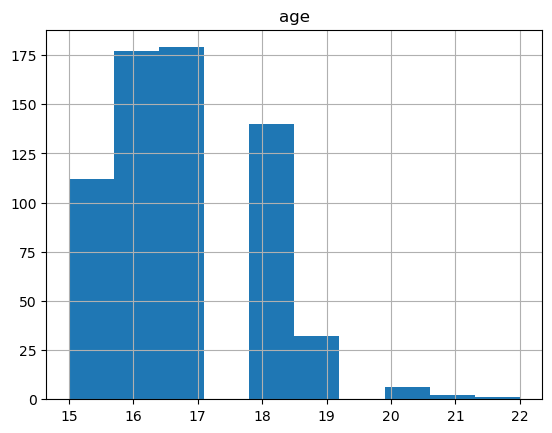

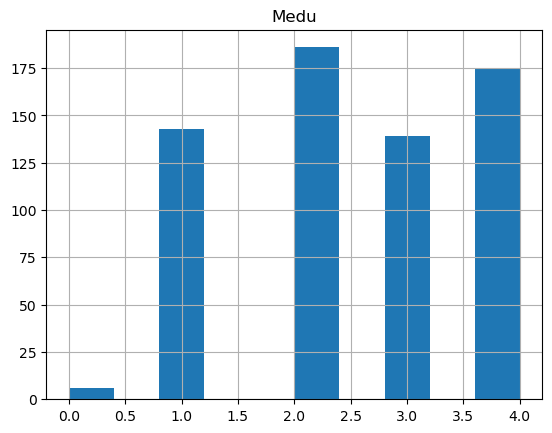

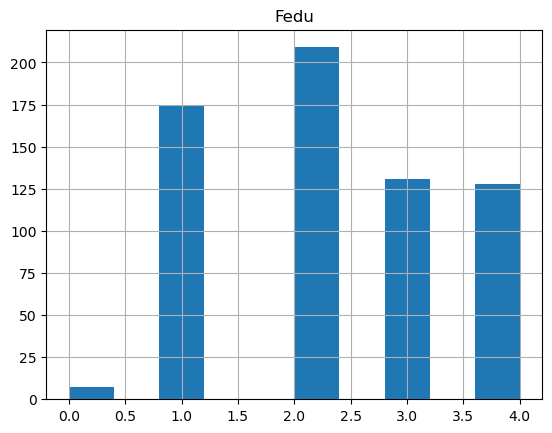

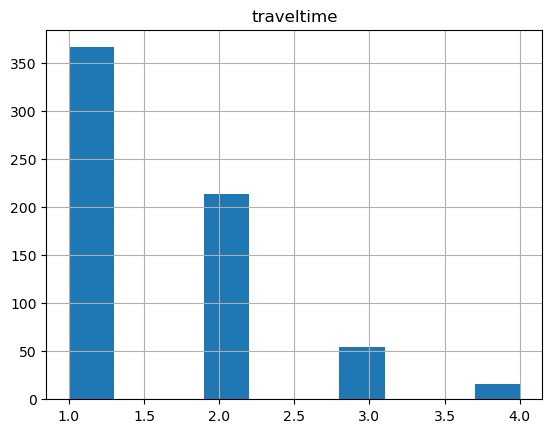

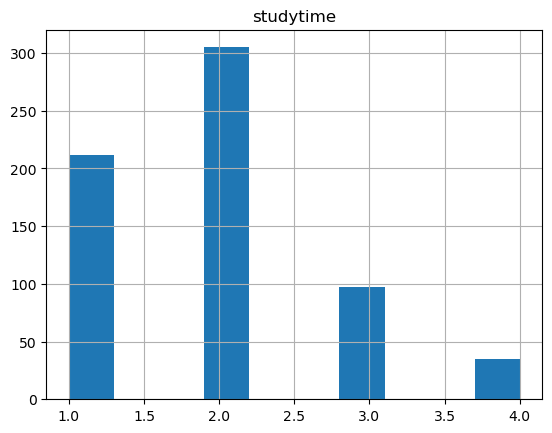

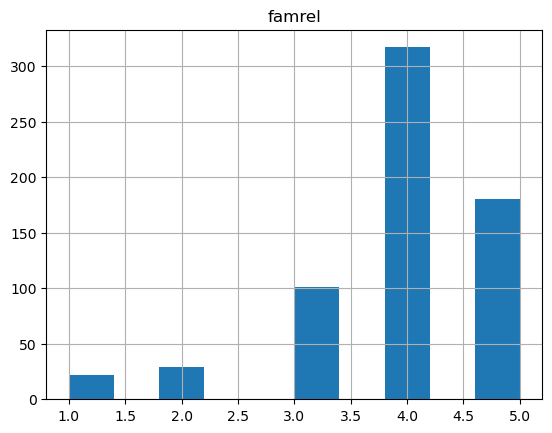

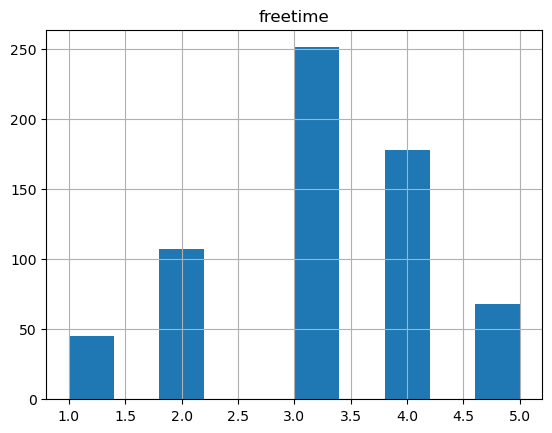

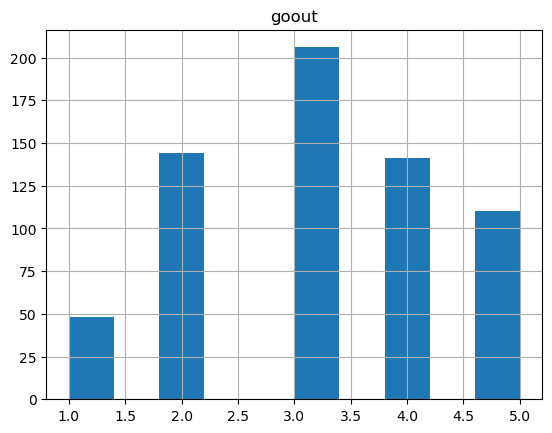

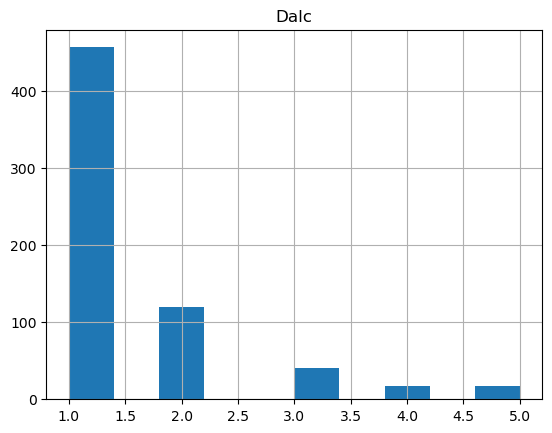

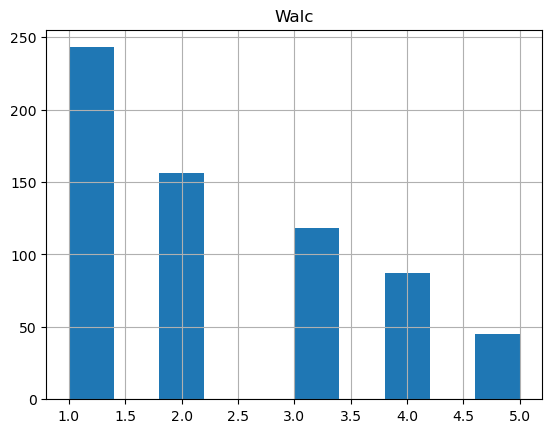

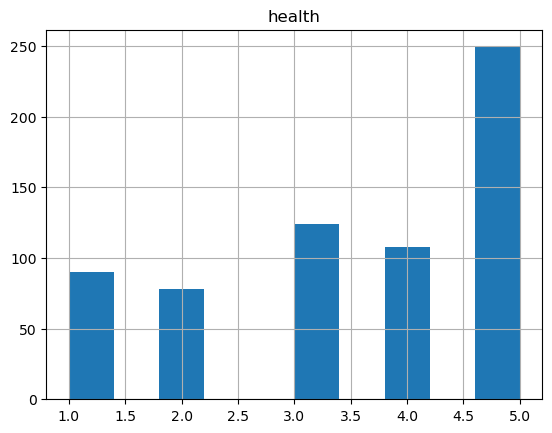

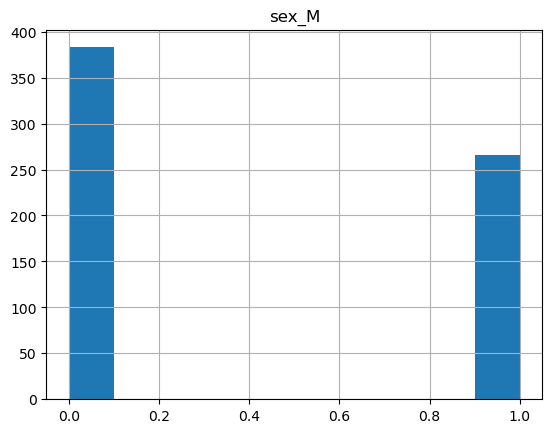

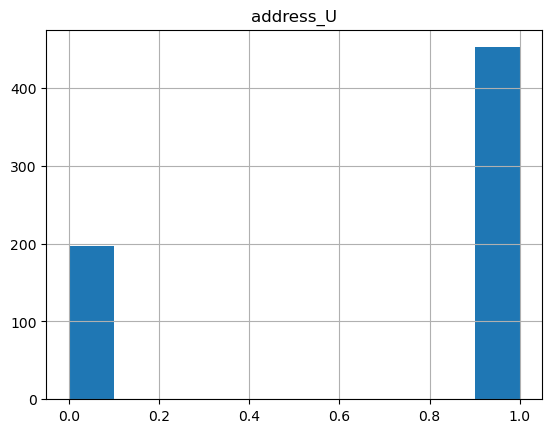

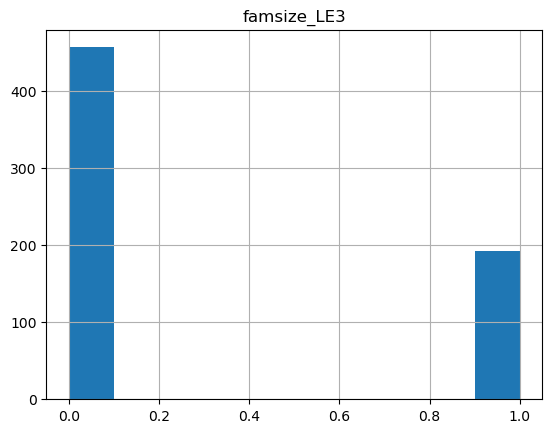

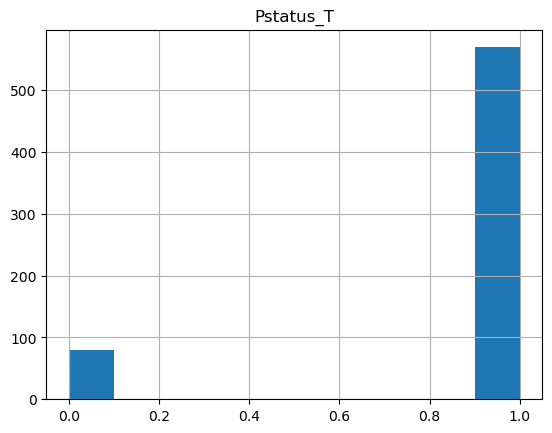

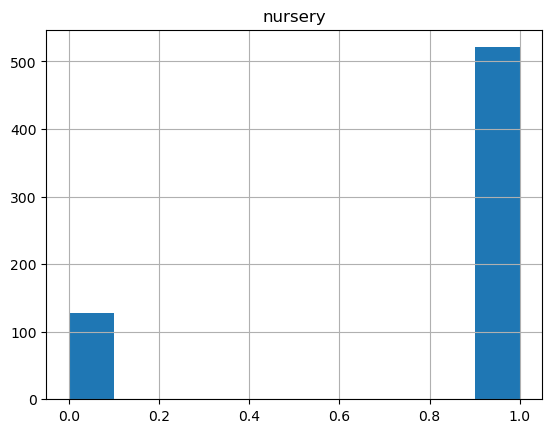

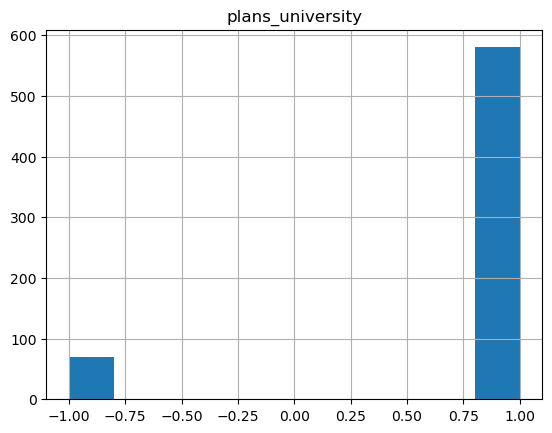

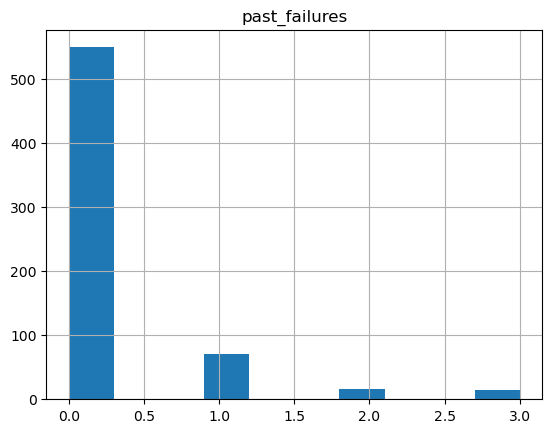

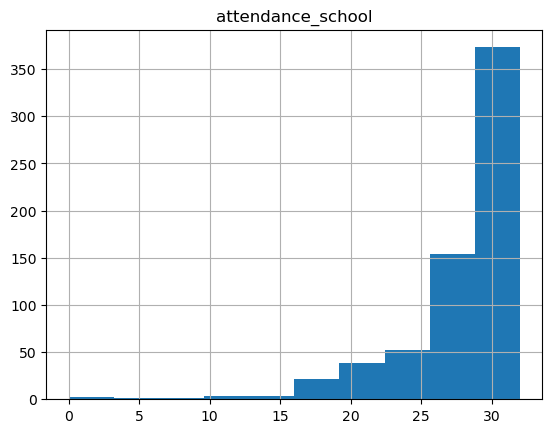

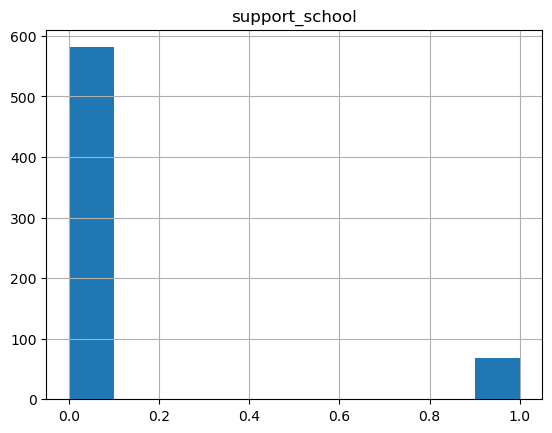

In [8]:
#Hint: возможно, все проблемы уже были найдены первым способом; для проверки — в сумме здесь нужно исправить 3 проблемы.
#Я исправил в первом пункте все 3 проблемы. Просто покажу, что я умею строить гистограммы:


for stolb in data.columns:
    data.hist (column = stolb)
#в целом, все гистограммы достаточно провдаподобны 

__(1.5 балла)__

Другой простой способ найти выбросы &mdash; сделать предсказание и посчитать ошибку на каждом объекте по отдельности и посмотреть на объекты с наибольшей ошибкой. Обучите линейную регрессию (функция fit) и для каждого объекта посчитайте среднеквадратичное отклонение. Постройте гистограмму распределения ошибок. Посмотрите на гистограмму и удалите из выборки те объекты на которых ошибка слишком большая.

Обратите внимание, что просто удалять все объекты с высокой ошибкой нельзя &mdash; это, конечно, хороший способ добиться меньшей ошибки (на данной выборке), но одновременно вы ухудшите обобщающую способность алгоритма. Вместо этого вам нужно найти однозначно ошибочные записи и их исправить.

*Hint: возможно, все проблемы уже были найдены первым способом; для проверки &mdash; в сумме здесь нужно исправить 3 проблемы.*

Для поиска ошибки на одном отдельном обьекте придётся обучить линейную регрессию руками. Частичный пример, допишите код. Постройте гистограмму распределения ошибок

In [13]:
import sklearn
from sklearn.linear_model import LinearRegression


#regression = linear_model.LinearRegression().fit(data, result) #create model and train it
#prediction = #calculate prediction for one object for vector x
#error = (prediction - y)**2 #simple error - square error

[18.  2.  2.  2.  2.  3.  3.  3.  5.  5.  4.  1.  1.  0.  1.  1.  1.  3.
 23.  0.]
[16.  1.  1.  2.  2.  3.  4.  3.  1.  1.  1.  0.  0.  0.  1.  1.  1.  3.
 32.  1.]
[17.  3.  2.  2.  1.  4.  5.  2.  1.  1.  2.  1.  1.  0.  1.  0. -1.  3.
 22.  0.]
[19.  2.  1.  2.  1.  4.  4.  3.  1.  3.  5.  1.  1.  0.  1.  0. -1.  3.
 28.  0.]
[18.  2.  1.  1.  2.  5.  4.  5.  1.  3.  5.  0.  1.  0.  1.  1. -1.  3.
 22.  0.]
[18.  2.  1.  1.  1.  3.  2.  5.  2.  5.  5.  1.  1.  0.  1.  0. -1.  2.
 28.  0.]
[19.  1.  1.  2.  2.  3.  5.  4.  1.  4.  1.  0.  0.  0.  0.  1. -1.  3.
 32.  0.]
[17.  2.  1.  2.  1.  4.  5.  1.  1.  1.  3.  1.  1.  0.  1.  1. -1.  3.
 32.  1.]
[18.  1.  1.  1.  1.  2.  3.  5.  2.  5.  4.  1.  1.  1.  1.  1. -1.  2.
 32.  0.]
[22.  3.  1.  1.  1.  5.  4.  5.  5.  5.  1.  1.  1.  0.  1.  0. -1.  3.
 20.  0.]
[17.  1.  2.  1.  1.  2.  2.  2.  3.  3.  5.  1.  0.  1.  1.  1.  1.  3.
 18.  0.]
[21.  1.  1.  2.  2.  5.  3.  3.  5.  2.  4.  1.  0.  1.  1.  1. -1.  2.
 11.  0.]


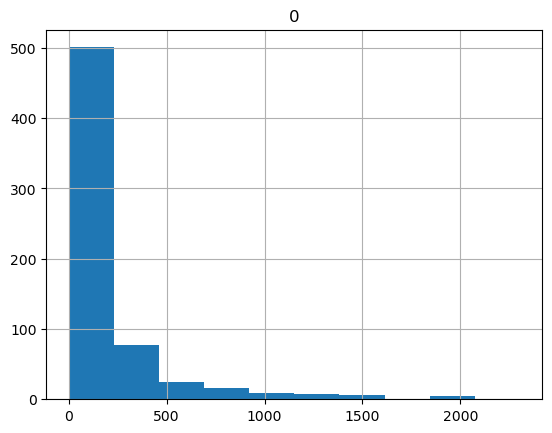

In [14]:
regression = LinearRegression().fit(data.values, scores.values)

error = []
for i in data.values:
    prediction = regression.predict([i])
    error.append(((int(prediction[0] - scores.values[0])**2)))
error = pd.DataFrame(error)
error.hist()
for i in range(len(error.values)):
    if(error.values[i][0] > 1500):
        print(data.values[i])

#данные выглядят достаточно провдаподобно и гистограмма ошибок показывает на +- правильное их распределение

### Финальное предсказание и отчёт (1 балл)

Проведите предсказание еще раз и сравните качество с исходным. Запишите свои наблюдения - как изменялось качество обучения модели при использовании разных модификаций данных. 

In [15]:
#Сначала все данные нормализуем:
for stolb in data.columns:
    mx = data[stolb].max()
    mn = data[stolb].min()
    for strok in range(data[stolb].size):
        data.loc[strok, stolb] = (data.loc[strok, stolb] - mn) / (mx - mn)
data.describe() 

#проведём предсказание ещё раз
model = LinearRegression()

vales = cross_val_score(model, data.values, scores.values, cv=4)
print("Cross-Validation Scores:")
vales

Cross-Validation Scores:


array([0.27060316, 0.2757387 , 0.12815065, 0.22059342])

При добавлении ещё двух двух признаков, предсказания чуть-чуть улучшились. В целом точность предсказаний слабо улучшается из-за маленького количества данных. Так же можно было бы в задаче 2 вместо среднего значения вставить медианное значение. Думаю это очень незначительно бы изменило точность предсказаний.